### Série temporal da poluição na China ###

A base de dados desta tarefa possui essas características, na qual temos em cada registro o ano, o mês, o dia e a hora juntamente com o valor de poluição naquele momento e algumas características climáticas.

**O objetivo desta tarefa é construir uma série temporal para prever a poluição na China em horas específicas**

**Importações iniciais**

In [282]:
from tensorflow.keras.models import Sequential # atualizado: tensorflow==2.0.0-beta1
from tensorflow.keras.layers import Dense, LSTM, Dropout # atualizado: tensorflow==2.0.0-beta1
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Carregamento da base de dados**

In [283]:
dataFrame = pd.read_csv('china_temporal.csv')

In [284]:
dataFrame

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


**Pré-processamento dos dados**

Em relação aos valores NaN, podemos realizar três ações:

* Exclução desses valores
* Substituição por 0
* Substituir pela média de cada coluna


In [285]:
dataFrame.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [286]:
dataFrame = dataFrame.dropna()

**Apagando colunas desnecessárias na nossa previsão**

Os atributos No , year , month , day , hour  e cbwd  devem ser excluídos, pois em uma série temporal essas informações não são importantes (o cbwd  é somente um campo string)

In [287]:
dataFrame = dataFrame.drop('No', axis = 1)
dataFrame = dataFrame.drop('year', axis = 1)
dataFrame = dataFrame.drop('month', axis = 1)
dataFrame = dataFrame .drop('day', axis = 1)
dataFrame = dataFrame .drop('hour', axis = 1)
dataFrame = dataFrame .drop('cbwd', axis = 1)

Nesse cenário, faremos a previsão dos valores das ações com a utilização de múltiplos previsores. Com isso, usaremos todos os atributos da base de dados.

In [288]:
base_treinamento = dataFrame.iloc[:,1:7].values

poluicao = dataFrame.iloc[:, 0].values



Nosso modelo trabalha com valores reais, podemos dizer assim. Dessa forma, podemos encontrar valores muito altos, que podem influenciar no treinamento. Para resolver essa problemática, podemos escolher duas opções:

* Normalização dos dados

* Padronização dos dados

Ambas as técnicas trabalham com o um único objetivo: deixar os dados na mesma grandeza. 




Para normalizar esse dados, vamos utilizar a função MinMaxScaler(), que irá transformar os dados em uma escala de 0 e 1.


In [289]:
normalizador = MinMaxScaler(feature_range = (0,1))

In [290]:
base_treinamento_normalizer = normalizador.fit_transform(base_treinamento)

In [291]:
poluicao = poluicao.reshape(-1,1)

normalizador_poluicao = normalizador.fit_transform(poluicao)

**Estrutura da base de previsão temporal I**


Quando trabalha-se com dados temporais é preciso definir um intervalo de tempo entre os dados e o alvo. Neste caso, podemos pegar um registro que tenha registros anteriores.



**Estrutura da base para previsão temporal II**

In [292]:
previsores = []
poluicao_real = []

for i in range(10, 41757):
    previsores.append(base_treinamento_normalizer[i-10:i, 0:6])
    poluicao_real.append(base_treinamento_normalizer[i, 0])
    
previsores, poluicao_real = np.array(previsores), np.array(poluicao_real)



Com a utilização da biblioteca Keras, nosso vetor de entradas precisa manter uma dimensão 3D com o formato:

            (batch_size, timesteps, input_dim)

Sendo:

   * Batch_size - refere-se ao número de exemplos de treinamento usados em uma intereção

   * Timesteps - refere-se a descrição da forma dos dados

   * Input_dim - refere-se ao número de entradas



**Estrutura da Rede Neural**

In [293]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, poluicao_real, epochs = 100, batch_size = 64)


Epoch 1/100
653/653 [==============================] - 19s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0799
Epoch 2/100
653/653 [==============================] - 20s 31ms/step - loss: 0.0052 - mean_absolute_error: 0.0556
Epoch 3/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0034 - mean_absolute_error: 0.0448
Epoch 4/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0025 - mean_absolute_error: 0.0384
Epoch 5/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0020 - mean_absolute_error: 0.0345
Epoch 6/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0316
Epoch 7/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0015 - mean_absolute_error: 0.0295
Epoch 8/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0280
Epoch 9/100
653/653 [==============================] - 18s 27ms/step - loss: 0.0012 - me

653/653 [==============================] - 19s 29ms/step - loss: 7.3812e-04 - mean_absolute_error: 0.0200
Epoch 71/100
653/653 [==============================] - 19s 30ms/step - loss: 7.3346e-04 - mean_absolute_error: 0.0200
Epoch 72/100
653/653 [==============================] - 21s 31ms/step - loss: 7.3196e-04 - mean_absolute_error: 0.0200
Epoch 73/100
653/653 [==============================] - 20s 30ms/step - loss: 7.3570e-04 - mean_absolute_error: 0.0201
Epoch 74/100
653/653 [==============================] - 20s 31ms/step - loss: 7.2334e-04 - mean_absolute_error: 0.0200
Epoch 75/100
653/653 [==============================] - 18s 28ms/step - loss: 7.3026e-04 - mean_absolute_error: 0.0200
Epoch 76/100
653/653 [==============================] - 21s 32ms/step - loss: 7.1868e-04 - mean_absolute_error: 0.0199
Epoch 77/100
653/653 [==============================] - 20s 31ms/step - loss: 7.2431e-04 - mean_absolute_error: 0.0199
Epoch 78/100
653/653 [==============================] - 19s 2

**Previsão dos dados**

In [294]:
previsoes = regressor.predict(previsores)
previsoes = normalizador.inverse_transform(previsoes)

 Verificação da média nos resultados das previsões e nos resultados reais


In [295]:
previsoes.mean()
poluicao.mean()

98.61321455085375

**Geração do gráfico. Será gerado um gráfico de barras porque temos muitos registros**

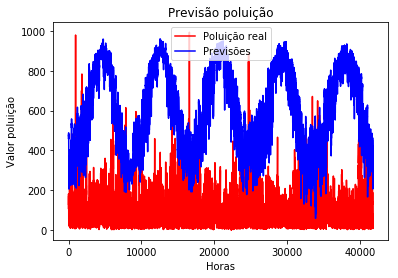

In [296]:
plt.plot(poluicao, color = 'red', label = 'Poluição real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão poluição')
plt.xlabel('Horas')
plt.ylabel('Valor poluição')
plt.legend()
plt.show()